## 2.  Predicting Appliance Energy Usage using Linear Regression

#### a. Train a standard linear regression model only on the training data. What are the RMSE and R2 on the training set, validation set, and test set?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file_train = 'train.csv'
file_valid = 'validation.csv'
file_test = 'test.csv'

In [2]:
# Read data; use datetime column as row label
df_train = pd.read_csv(file_train, index_col=0)
df_valid = pd.read_csv(file_valid, index_col=0)
df_test = pd.read_csv(file_test, index_col=0)

df_train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,...,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.00000
mean,98.509172,5.327861,20.705134,40.306429,19.335261,40.362503,20.812207,40.247603,19.522667,39.553929,...,20.709721,43.916035,17.915381,42.233940,4.391101,756.003811,84.081129,4.516064,39.448819,1.74520
std,108.937504,9.231654,1.236850,3.908087,1.456727,3.235719,1.180006,3.497662,1.428879,4.846758,...,1.585853,5.833029,1.035449,4.320856,3.677116,8.951456,11.770324,2.726801,13.603770,3.68758
min,10.000000,0.000000,16.790000,31.426667,16.100000,30.160000,17.200000,32.626667,15.100000,30.723333,...,16.306667,29.600000,14.890000,33.193333,-5.000000,729.300000,45.000000,0.000000,1.000000,-6.60000
25%,50.000000,0.000000,19.890000,37.090000,18.290000,38.146250,20.100000,37.200000,18.700000,35.352500,...,19.725000,39.400000,17.290000,38.767083,1.880000,749.800000,77.666667,2.000000,28.166667,-0.70000
50%,60.000000,0.000000,20.790000,39.933333,19.323333,40.326667,20.790000,39.963333,19.600000,38.466667,...,20.790000,43.790000,18.000000,41.163333,4.400000,757.266667,87.833333,4.000000,40.000000,1.45000
75%,100.000000,10.000000,21.500000,43.500000,20.356667,42.852500,21.600000,43.530000,20.500000,43.650833,...,21.823333,48.818056,18.550000,45.933333,7.000000,763.300000,93.000000,6.166667,47.916667,3.90000
max,1080.000000,70.000000,24.100000,63.360000,23.600000,50.260000,25.500000,50.163333,23.760000,51.090000,...,25.200000,58.780000,20.133333,53.326667,13.100000,772.300000,100.000000,14.000000,65.000000,10.70000


In [3]:
# Prepare data
X_train = df_train.drop(columns='Appliances')
y_train = df_train['Appliances']
X_valid = df_valid.drop(columns='Appliances')
y_valid = df_valid['Appliances']
X_test = df_test.drop(columns='Appliances')
y_test = df_test['Appliances']

In [4]:
# Train linear regression model
from sklearn import linear_model

lm = linear_model.LinearRegression(normalize=True)
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

122.19850001307037
[  2.49142105 -12.62975084  11.10982314 -10.53385167 -18.63619213
  22.44680026  15.37017797  -1.43165818  -1.56061483  -0.64121204
  -0.23622176   5.48906361  -0.07221924   1.07944962   0.39871029
   2.4688714   -4.42232362  -1.03333533  -5.3993251  -18.33547027
   0.45170091  -2.42176738   0.12907983   0.23436318  17.1855139 ]


/Users/liyanxu/VirtualEnv/playground/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [5]:
# Define RMSE
def rmse(lm, X, y):
    return np.sqrt(np.mean((lm.predict(X) - y)**2))

In [6]:
# Define R Squared
def r_squared(lm, X, y):
    return 1 - np.sum((y - lm.predict(X))**2) / np.sum((y - np.mean(y))**2)

In [7]:
# Compute RMSE and R Squared scores
rmse_train = rmse(lm, X_train, y_train)
r2_train = r_squared(lm, X_train, y_train)
rmse_valid = rmse(lm, X_valid, y_valid)
r2_valid = r_squared(lm, X_valid, y_valid)
rmse_test = rmse(lm, X_test, y_test)
r2_test = r_squared(lm, X_test, y_test)

# Print out scores
scores = pd.DataFrame([[rmse_train, r2_train], [rmse_valid, r2_valid], [rmse_test, r2_test]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores

,RMSE,R Squared
train,98.235447,0.186747
validation,97.536065,0.002646
test,100.041271,-0.211952


#### b. Train a standard linear regression model using training and validation together. What are the RMSE and R2 on the training set, validation set, and test set? How does this compare to the previous part? And what do the numbers suggest?

In [8]:
# Prepare data
X_train_b = np.vstack((X_train, X_valid))
y_train_b = np.hstack((y_train, y_valid))

In [9]:
# Train linear regression model
lm.fit(X_train_b, y_train_b)

print(lm.intercept_)
print(lm.coef_)

43.20841993164444
[  2.10289834   0.15310425  13.90906779 -19.01042498 -13.87911467
  26.33301492   8.64328114  -3.73248099  -1.61724591  -1.8055492
   0.11724207   8.90970471   0.35131895   1.20724581  -0.88807926
   7.88981872  -5.72048114 -13.25244003  -0.98768095 -11.807713
   0.13244474  -1.0108648    0.84148796   0.19345625   5.916061  ]


In [10]:
# Compute RMSE and R Squared scores
rmse_train = rmse(lm, X_train, y_train)
r2_train = r_squared(lm, X_train, y_train)
rmse_valid = rmse(lm, X_valid, y_valid)
r2_valid = r_squared(lm, X_valid, y_valid)
rmse_test = rmse(lm, X_test, y_test)
r2_test = r_squared(lm, X_test, y_test)

# Print out scores
scores = pd.DataFrame([[rmse_train, r2_train], [rmse_valid, r2_valid], [rmse_test, r2_test]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores

,RMSE,R Squared
train,99.388509,0.167544
validation,88.702055,0.175128
test,86.406722,0.095888


The RMSE scores for validation and test data are lower, and the R Squared scores for valdiation and test data are higher, which means the linear regression model overall predicts better results.
Also the RMSE score for training data is slightly higher, and the R Squared score for training data is slightly lower.

It suggests that
* In question a, we overfit the model towards training set, which doesn't generalize enough to overall data. In question b, we add more data to training set, which causes RMSE higher for original training set, but lower for overall dataset, therefore it yeilds better prediction. We should try to avoid overfitting.
* Adding more training data is helpful to reduce overfitting and yields better results.

#### c. Train ridge regression and lasso regression only on the training data. You will want to consider a range of parameter values (λ) to find the optimal regularization parameter that gives you the lowest RMSE or R2 on the validation dataset. Report (using a table) the RMSE and R2 for training, validation, and test for all the different (λ) values you tried.

In [39]:
# Define function to train with a list of lambdas
def train_with_lambdas(lm, lambdas, X_train, y_train, X_valid, y_valid, X_test, y_test):
    rmses = []
    r2s = []
    for lambda_ in lambdas:
        lm.set_params(alpha=lambda_, normalize=True)
        lm.fit(X_train, y_train)
        rmses.append([rmse(lm, X_train, y_train),
                    rmse(lm, X_valid, y_valid),
                    rmse(lm, X_test, y_test)])
        r2s.append([r_squared(lm, X_train, y_train),
                  r_squared(lm, X_valid, y_valid),
                  r_squared(lm, X_test, y_test)])
    return rmses, r2s

In [40]:
# Train ridge linear regression model
lm_ridge = linear_model.Ridge()
lambdas_ridge = np.linspace(0, 5, 100)

rmses_ridge, r2s_ridge = train_with_lambdas(lm_ridge, lambdas_ridge,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

In [41]:
# Train lasso linear regression model
lm_lasso = linear_model.Lasso()
lambdas_lasso = np.linspace(0.01, 0.5, 100)

rmses_lasso, r2s_lasso = train_with_lambdas(lm_lasso, lambdas_lasso,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

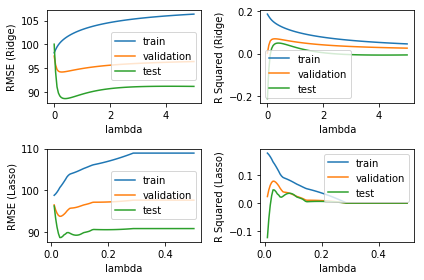

In [42]:
# Plot scores for ridge
fig, (axs_ridge, axs_lasso) = plt.subplots(2, 2)

lineObjects_ridge_rmse = axs_ridge[0].plot(lambdas_ridge, rmses_ridge)
axs_ridge[0].set_xlabel('lambda')
axs_ridge[0].set_ylabel('RMSE (Ridge)')
axs_ridge[0].legend(lineObjects_ridge_rmse, ['train', 'validation', 'test'])

lineObjects_ridge_r2 = axs_ridge[1].plot(lambdas_ridge, r2s_ridge)
axs_ridge[1].set_xlabel('lambda')
axs_ridge[1].set_ylabel('R Squared (Ridge)')
axs_ridge[1].legend(lineObjects_ridge_r2, ['train', 'validation', 'test'])

lineObjects_lasso_rmse = axs_lasso[0].plot(lambdas_lasso, rmses_lasso)
axs_lasso[0].set_xlabel('lambda')
axs_lasso[0].set_ylabel('RMSE (Lasso)')
axs_lasso[0].legend(lineObjects_lasso_rmse, ['train', 'validation', 'test'])

lineObjects_lasso_r2 = axs_lasso[1].plot(lambdas_lasso, r2s_lasso)
axs_lasso[1].set_xlabel('lambda')
axs_lasso[1].set_ylabel('R Squared (Lasso)')
axs_lasso[1].legend(lineObjects_lasso_r2, ['train', 'validation', 'test'])

plt.tight_layout()
plt.show()

We can see from the plot that,
* There exists a $\lambda$ for **ridge** in $(0, 0.5)$ that generates minimum RMSE scores and maximum R Squared scores (for validation and test data).
* There exists a $\lambda$ for **lasso** in $(0, 0.1)$ that generates minimum RMSE scores and maximum R Squared scores (for validation and test data).

Show tables with tighter bound of $\lambda$ to pick the optimal regularization parameter.

In [51]:
# Re-train ridge linear regression model with tighter lambda bound
lambdas_ridge = np.linspace(0, 0.6, 20)

rmses_ridge, r2s_ridge = train_with_lambdas(lm_ridge, lambdas_ridge,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

In [52]:
# Show RMSE scores for ridge
df_ridge_rmses = pd.DataFrame(np.array(rmses_ridge).T,
                        ['train', 'validation', 'test'],
                        lambdas_ridge)
df_ridge_rmses

,0.0,0.031578947368421054,0.06315789473684211,0.09473684210526316,0.12631578947368421,0.15789473684210525,0.18947368421052632,0.2210526315789474,0.25263157894736843,0.28421052631578947,0.3157894736842105,0.3473684210526316,0.37894736842105264,0.4105263157894737,0.4421052631578948,0.4736842105263158,0.5052631578947369,0.5368421052631579,0.5684210526315789,0.6
train,98.235447,98.638174,99.047961,99.401576,99.705857,99.97165,100.207579,100.419981,100.613479,100.791491,100.956589,101.110743,101.255491,101.392051,101.521403,101.644350,101.761552,101.873564,101.980855,102.083825
validation,97.536065,96.469933,95.333966,94.776902,94.482864,94.32181,94.234199,94.189983,94.172770,94.173043,94.184983,94.204884,94.230295,94.259551,94.291485,94.325264,94.360283,94.396093,94.432357,94.468819
test,100.041271,96.498321,93.070603,91.284484,90.264255,89.64018,89.240682,88.978285,88.804728,88.691571,88.621088,88.581693,88.565491,88.566913,88.581906,88.607446,88.641224,88.681446,88.726694,88.775836


In [53]:
# Show R Squared scores for ridge
df_ridge_r2s = pd.DataFrame(np.array(r2s_ridge).T,
                        ['train', 'validation', 'test'],
                        lambdas_ridge)
df_ridge_r2s

,0.0,0.031578947368421054,0.06315789473684211,0.09473684210526316,0.12631578947368421,0.15789473684210525,0.18947368421052632,0.2210526315789474,0.25263157894736843,0.28421052631578947,0.3157894736842105,0.3473684210526316,0.37894736842105264,0.4105263157894737,0.4421052631578948,0.4736842105263158,0.5052631578947369,0.5368421052631579,0.5684210526315789,0.6
train,0.186747,0.180065,0.173238,0.167325,0.162219,0.157746,0.153766,0.150175,0.146897,0.143876,0.141069,0.138443,0.135975,0.133643,0.131431,0.129326,0.127317,0.125395,0.123551,0.121781
validation,0.002646,0.024330,0.047172,0.058275,0.064109,0.067297,0.069029,0.069902,0.070242,0.070237,0.070001,0.069608,0.069106,0.068528,0.067897,0.067229,0.066536,0.065827,0.065110,0.064387
test,-0.211952,-0.127630,-0.048943,-0.009069,0.013360,0.026956,0.035610,0.041273,0.045009,0.047441,0.048955,0.049800,0.050148,0.050117,0.049796,0.049248,0.048523,0.047659,0.046687,0.045631


In [54]:
# Re-train lasso linear regression model with tighter lambda bound
lambdas_lasso = np.linspace(0.01, 0.1, 20)

rmses_lasso, r2s_lasso = train_with_lambdas(lm_lasso, lambdas_lasso,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

In [55]:
# Show RMSE scores for lasso
df_lasso_rmses = pd.DataFrame(np.array(rmses_lasso).T,
                        ['train', 'validation', 'test'],
                        lambdas_lasso)
df_lasso_rmses

,0.01,0.01473684210526316,0.019473684210526317,0.024210526315789474,0.02894736842105263,0.03368421052631579,0.03842105263157895,0.04315789473684211,0.04789473684210527,0.052631578947368425,0.05736842105263158,0.06210526315789474,0.0668421052631579,0.07157894736842106,0.07631578947368421,0.08105263157894736,0.08578947368421053,0.09052631578947369,0.09526315789473684,0.1
train,98.841753,99.145821,99.552344,100.029608,100.606588,101.035946,101.479187,101.968886,102.447453,102.977474,103.489141,103.741463,103.957323,104.060417,104.170436,104.287365,104.411198,104.541903,104.679455,104.823826
validation,96.547926,95.411761,94.622797,94.094816,93.837635,93.828315,93.975966,94.226135,94.520721,94.903042,95.307612,95.568629,95.770861,95.789383,95.823202,95.872283,95.936580,96.016072,96.110721,96.220482
test,96.284470,93.513850,91.421236,89.877456,88.812200,88.742433,88.944773,89.287607,89.517065,89.768394,90.018631,89.855388,89.719199,89.548318,89.421705,89.339513,89.301877,89.308850,89.360423,89.456518


In [56]:
# Show R Squared scores for lasso
df_lasso_r2s = pd.DataFrame(np.array(r2s_lasso).T,
                        ['train', 'validation', 'test'],
                        lambdas_lasso)
df_lasso_r2s

,0.01,0.01473684210526316,0.019473684210526317,0.024210526315789474,0.02894736842105263,0.03368421052631579,0.03842105263157895,0.04315789473684211,0.04789473684210527,0.052631578947368425,0.05736842105263158,0.06210526315789474,0.0668421052631579,0.07157894736842106,0.07631578947368421,0.08105263157894736,0.08578947368421053,0.09052631578947369,0.09526315789473684,0.1
train,0.176677,0.171604,0.164797,0.156770,0.147014,0.139718,0.132153,0.123757,0.115513,0.106337,0.097434,0.093028,0.089250,0.087442,0.085512,0.083458,0.081280,0.078978,0.076553,0.074004
validation,0.022752,0.045617,0.061335,0.071781,0.076848,0.077031,0.074124,0.069188,0.063359,0.055767,0.047699,0.042476,0.038419,0.038047,0.037368,0.036381,0.035088,0.033489,0.031582,0.029369
test,-0.122637,-0.058958,-0.012095,0.021798,0.044849,0.046349,0.041995,0.034595,0.029627,0.024171,0.018723,0.022278,0.025240,0.028949,0.031693,0.033473,0.034287,0.034136,0.033020,0.030939


From the table, we can see that,
* when $\lambda$ is $0.379$ for **ridge**, it yields lowest RMSE and highest R Squared.
* when $\lambda$ is $0.034$ for **lasso**, it yields lowest RMSE and highest R Squared.

#### d. Similar to part (b), train ridge and lasso using both the training and validation set (with your optimal regularization parameter from (c)). What are the RMSE and R2 on the training set, validation set, and test set? How does this compare to the previous part? What do the numbers suggest?

In [57]:
# Prepare data
X_train_d = np.vstack((X_train, X_valid))
y_train_d = np.hstack((y_train, y_valid))

In [63]:
# Train linear regression model with optimal lambda
lm_ridge = linear_model.Ridge()
lm_ridge.set_params(alpha=0.379, normalize=True)
lm_ridge.fit(X_train_d, y_train_d)

lm_lasso = linear_model.Lasso()
lm_lasso.set_params(alpha=0.034, normalize=True)
lm_lasso.fit(X_train_d, y_train_d)

Lasso(alpha=0.034, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
# Compute RMSE and R Squared scores for ridge
rmse_train_ridge = rmse(lm_ridge, X_train, y_train)
r2_train_ridge = r_squared(lm_ridge, X_train, y_train)
rmse_valid_ridge = rmse(lm_ridge, X_valid, y_valid)
r2_valid_ridge = r_squared(lm_ridge, X_valid, y_valid)
rmse_test_ridge = rmse(lm_ridge, X_test, y_test)
r2_test_ridge = r_squared(lm_ridge, X_test, y_test)

# Print out scores
scores_ridge = pd.DataFrame([[rmse_train_ridge, r2_train_ridge],
                       [rmse_valid_ridge, r2_valid_ridge],
                       [rmse_test_ridge, r2_test_ridge]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores_ridge

,RMSE,R Squared
train,101.932256,0.124387
validation,92.023921,0.112189
test,86.064936,0.103027


In [65]:
# Compute RMSE and R Squared scores for lasso
rmse_train_lasso = rmse(lm_lasso, X_train, y_train)
r2_train_lasso = r_squared(lm_lasso, X_train, y_train)
rmse_valid_lasso = rmse(lm_lasso, X_valid, y_valid)
r2_valid_lasso = r_squared(lm_lasso, X_valid, y_valid)
rmse_test_lasso = rmse(lm_lasso, X_test, y_test)
r2_test_lasso = r_squared(lm_lasso, X_test, y_test)

# Print out scores
scores_lasso = pd.DataFrame([[rmse_train_lasso, r2_train_lasso],
                       [rmse_valid_lasso, r2_valid_lasso],
                       [rmse_test_lasso, r2_test_lasso]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores_lasso

,RMSE,R Squared
train,102.997691,0.105986
validation,93.544648,0.082604
test,88.800347,0.045103


From the score tables we can see that,
* For ridge model with $\lambda$, the performance is about the same with the linear regression model from question b.
* For lasso model with $\lambda$, it overall performs worse than the model from question b.

It suggests that if we add more training data, the optimal regularization parameter $\lambda$ will vary???

#### e. Generate the coefficient path plots (regularization value vs. coefficient value) for both ridge and lasso. Also, note (line or point or star) where the optimal regularization parameters are on their respective plots. Make sure that your plots encompass all the expected behavior (coefficients should shrink towards 0).